In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# EDA

In [5]:
# Load dataset
df = pd.read_csv("alzheimers_disease_data.csv")

# Basic info
df.shape

(2149, 35)

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

- The dtype of the entire dataframe itself is an object (due to existence of the non-informative DoctorInCharge column).
- All other columns are either integers or floats.

PyCaret often struggles when mixing integer and float features because its automatic preprocessor may misinterpret integer columns with low cardinality as categorical features, creating unnecessary one-hot encoding. Converting all features to floats forces uniform numerical handling, preventing improper categorical transformations, fixing data type conflicts (e.g., int vs. str), and improving consistency. 
- Wrong Feature Type Inference: PyCaret’s setup function may misinterpret integer features (especially if they look like IDs or codes) as categorical, leading to unexpected one-hot encoding that breaks models.
- Data Type Conflicts: Mixing integer and float types can cause silent errors in underlying algorithms (like "can't compare int and str" errors), leading to poor performance or failed training.
- Categorical vs. Numerical Treatment: When integers are mixed with floats, PyCaret may miscalculate the number of unique values required to treat a feature as numerical, wrongly flagging integers as categorical.
- Improved Consistency: Converting everything to float ensures the preprocessing pipeline treats all data as numerical, applying uniform normalization and scaling, which allows algorithms to calculate gradients and distances correctly. 

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


# Data Quality Checks

In [56]:
df.isnull().sum().sort_values(ascending=False)

PatientID                    0
BehavioralProblems           0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
ADL                          0
DiastolicBP                  0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
CholesterolTotal             0
SystolicBP                   0
Age                          0
PhysicalActivity             0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
DietQuality                  0
Hypertension                 0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depressi

- There are no missing values in every column.

In [57]:
df.duplicated().sum()

0

- There are no duplicated values.

# Univariate Analysis

## Distribution of Numerical Features

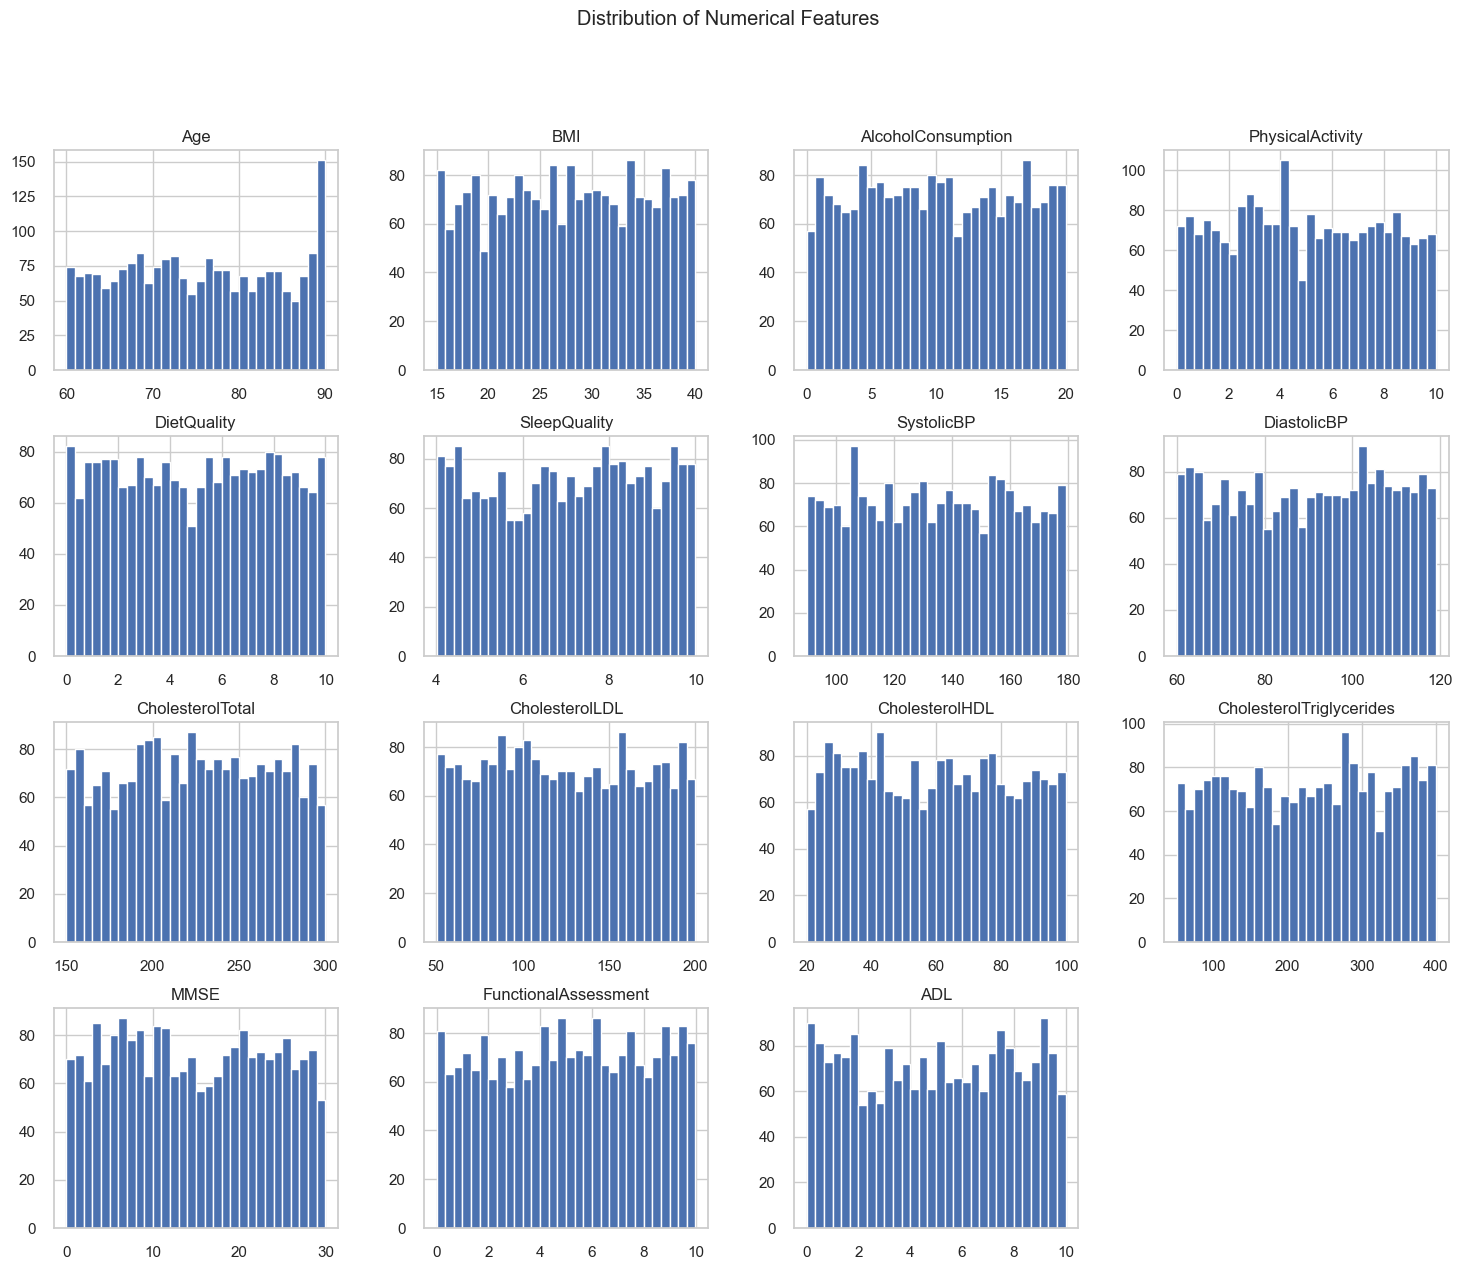

In [58]:
numerical_cols = [
    "Age", "BMI", "AlcoholConsumption", "PhysicalActivity",
    "DietQuality", "SleepQuality", "SystolicBP", "DiastolicBP",
    "CholesterolTotal", "CholesterolLDL", "CholesterolHDL",
    "CholesterolTriglycerides", "MMSE",
    "FunctionalAssessment", "ADL"
]

df[numerical_cols].hist(bins=30, figsize=(18, 14))
plt.suptitle("Distribution of Numerical Features")
plt.show()

Looking at these histograms, the first thing that jumps out is how perfectly distributed most of these variables are. In real-world medical data, we usually see a lot more noise or Gaussian distributions.

### Key Interpretations

**1. Uniform Distributions:** Nearly every feature (BMI, Alcohol Consumption, Diet Quality, etc.) shows a Uniform Distribution. This means every value in the range is represented almost equally.

- Observation: This is often a sign of a synthetic or "toy" dataset. While great for ensuring our model sees all types of data, it’s not how biology usually works (e.g., BMI usually clusters around 25-30 at the common 'Healthy' range).

**2. Age = 90 Spike:** There is a sharp spike at age 90.

- Observation: This suggests a ceiling effect or "right-censoring." It’s likely that any patient 90 or older was grouped into a single "90" category.

**3. Scale Variance:** Some features are on completely different scales.

- Observation: ADL ranges from 0–10, while CholesterolTriglycerides goes up to 400. Without processing, our ML model might "think" Triglycerides are 40 times more important than ADL simply because the numbers are bigger.

**ACTIONS**

*1. Feature Scaling (Mandatory)*
Since I will test various models these values need to be brought to a similar range with these methods:
  - Standardization: Transforms data to have a mean of 0 and a standard deviation of 1.
  - Normalization (Min-Max Scaling): Rescales everything to a range of [0, 1]. This is particularly useful for features like MMSE or ADL which already have strict boundaries.

*2. Handling the Age Spike*
If a model sees a disproportionate amount of "90-year-olds," it might become biased toward that specific value. I can consider
  - Binning "Age" into groups (e.g., 60-70, 71-80, 81-90) to smooth out the spike.

## Outlier Detection

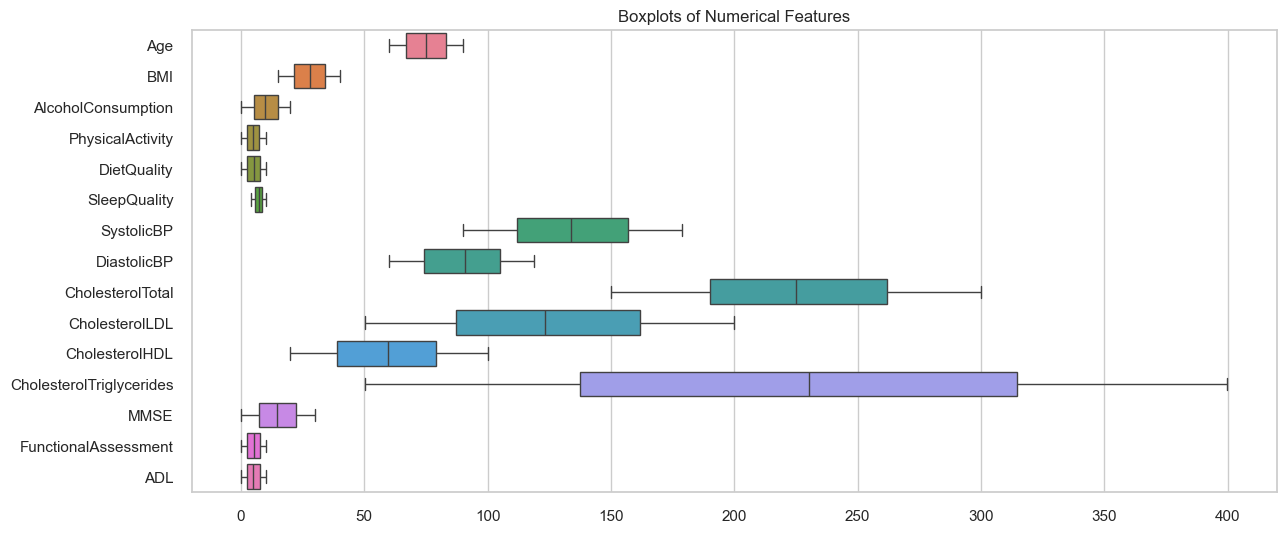

In [59]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numerical_cols], orient="h")
plt.title("Boxplots of Numerical Features")
plt.show()

### Key Interpretations
**The Scale Problem:** Look at the bottom five features (MMSE through ADL) compared to CholesterolTriglycerides. The assessment scores are essentially "squashed" near the zero line because their range (0–10 or 0–30) is tiny compared to the 400-point range of Triglycerides.

- ML Impact: If you feed this directly into a model like Logistic Regression or SVM, the model will mathematically treat a 1-unit change in Triglycerides as equal to a 1-unit change in ADL, which is incorrect.

- The "Clean" Data Mystery: There are zero outliers visible (no individual dots beyond the whiskers).

- Observation: In real clinical data, you would almost always see "fringe" cases—someone with a BMI of 55 or exceptionally high blood pressure. The lack of outliers further confirms this is likely a synthetic or heavily pre-cleaned dataset.

**Symmetry:** The medians (the vertical lines inside the boxes) are almost perfectly centered. This indicates the data is balanced and lacks the "skew" typically found in medical populations (e.g., usually, there are more people with high blood pressure than dangerously low blood pressure).

**Mandatory Processing Steps:**
To satisfy the Data Preprocessing requirement of your assignment, your pipeline must include:

- Feature Scaling (Crucial): Because your features live in different "universes" of magnitude, you need to normalize them. * Standardization (StandardScaler): Centers the data around 0 with a standard deviation of 1. This is usually the "safe" default for most ML algorithms.

- Min-Max Scaling (MinMaxScaler): Squishes everything into a strict 0-to-1 range. This is great if you want to preserve the exact boundaries of scores like MMSE.

Pipeline Integration (MLOps Requirement): Since this is an MLOps project, you shouldn't just scale the data once. You should use a Scikit-Learn Pipeline. This ensures that when you deploy your web app, the "live" user data is scaled using the exact same parameters (mean/variance) as your training data.

Feature Group,Range (Approx),Scaling Priority

"Blood Chemistry (Triglycerides, LDL)",50 – 400,Extreme

Vitals (Systolic/Diastolic BP),60 – 180,High

"Cognitive Scores (MMSE, ADL, FA)",0 – 30,Moderate

"Lifestyle (Diet, Sleep, Activity)",0 – 10,Moderate

## Categorical Features

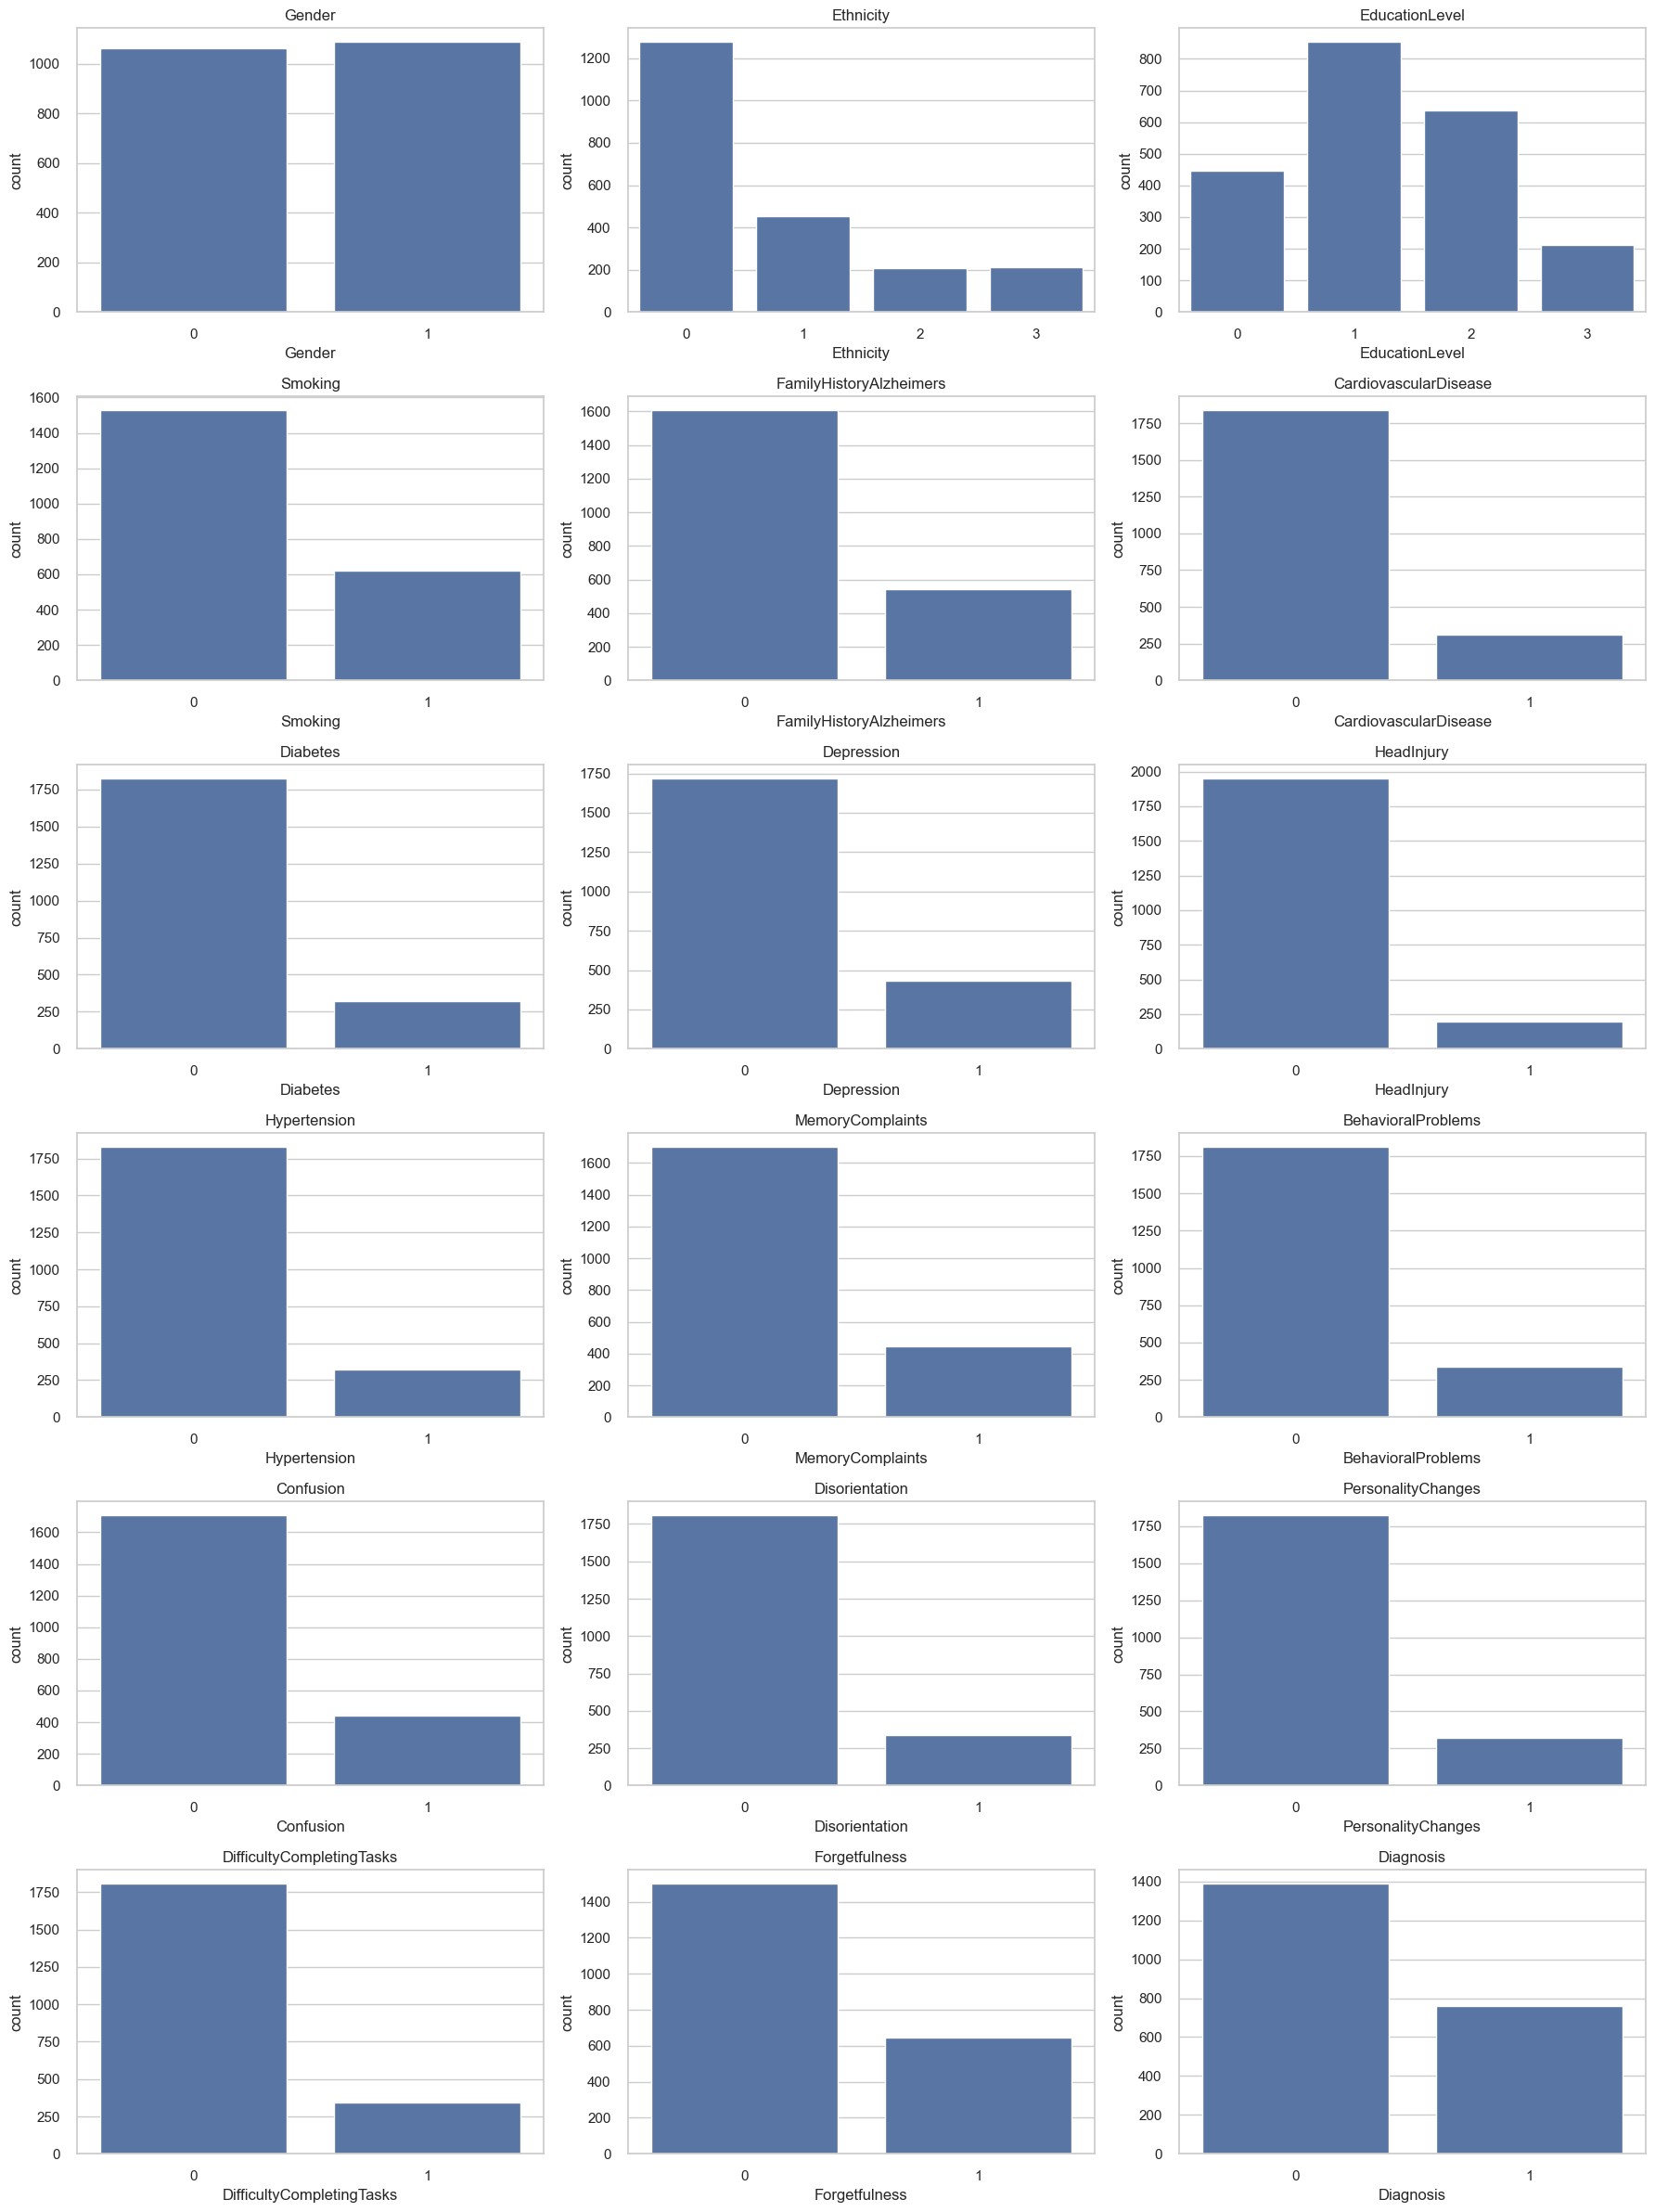

In [60]:
categorical_cols = [
    "Gender", "Ethnicity", "EducationLevel", "Smoking",
    "FamilyHistoryAlzheimers", "CardiovascularDisease",
    "Diabetes", "Depression", "HeadInjury", "Hypertension",
    "MemoryComplaints", "BehavioralProblems",
    "Confusion", "Disorientation", "PersonalityChanges",
    "DifficultyCompletingTasks", "Forgetfulness",
    "Diagnosis"
]

fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Class Imbalances: 
- The target variable, Diagnosis, is noticeably imbalanced. There are significantly more healthy cases ($0$) than Alzheimer's cases ($1$).Processing Need: We may need to use techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjust the class_weight parameter in our models to ensure it doesn't just get really good at predicting "No Diagnosis".
- Medical & Symptom Sparsity: Features like HeadInjury, CardiovascularDisease, and Disorientation have very few positive ($1$) cases.
- > Insight: These are "sparse features." They might be very strong predictors when they are present, but the model has very few examples to learn from.
- Demographic Skew: Ethnicity is dominated by Category $0$. If Category $0$ represents a specific racial group, your model might perform poorly (or be biased) when predicting for minority groups in the dataset.

# Target Analysis

## Class Distribution

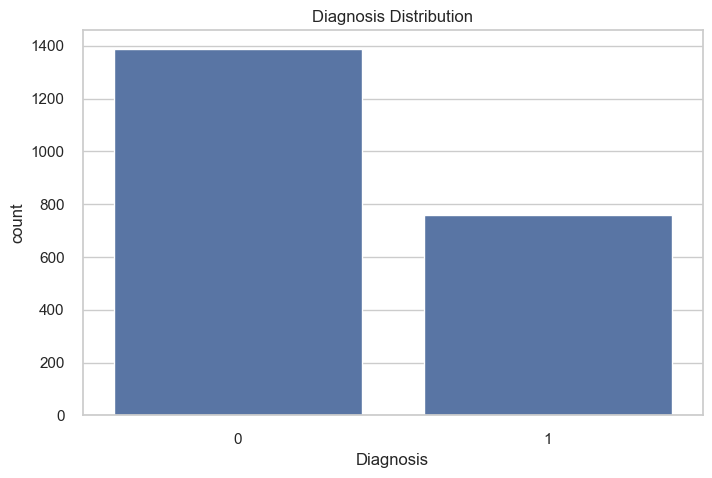

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64

In [61]:
sns.countplot(x=df["Diagnosis"])
plt.title("Diagnosis Distribution")
plt.show()

df["Diagnosis"].value_counts(normalize=True)

### Interpretation
The class imbalance of the Diagnosis target viariable is roughly 2:1 skewed to 0. Which means it's 1/3 of the total dataset. This is generally considered a very mild or manageable level of imbalance in machine learning. It is often not severe enough to require intense resampling techniques like SMOTE, and many algorithms can handle this ratio without significant performance issues. 
- Mild Skew: Compared to typical real-world imbalances of 10:1 to 1000:1, a 2:1 ratio is close to balanced.
- Model Capability: Modern classification algorithms can often learn to distinguish classes with this slight skew without bias.
- Less Overfitting: Using aggressive oversampling (e.g., trying to force a 1:1 ratio) on a 2:1 dataset may actually lead to overfitting.

Step,Action,Reason
1. One-Hot Encoding,Convert Ethnicity and EducationLevel,"These are multi-class. If they aren't ordinal (ranked), the model might misinterpret the numbers 0,1,2 as weights."
2. Robust Scaling,Apply StandardScaler to all numerical cols,This fixes the magnitude gap between ADL (0−10) and Triglycerides (0−400).
3. Balancing,Implement SMOTE or Random OverSampling,"This compensates for the fact that you have nearly double the ""No Diagnosis"" cases as ""Diagnosis"" cases."

### Precaution:
In medical diagnosis, missing a minority class instance (False Negative) is very costly, 2:1 might still be too imbalanced for standard accuracy metrics, requiring techniques like cost-sensitive learning. 

# Correlation Analysis

## Correlation Heatmap

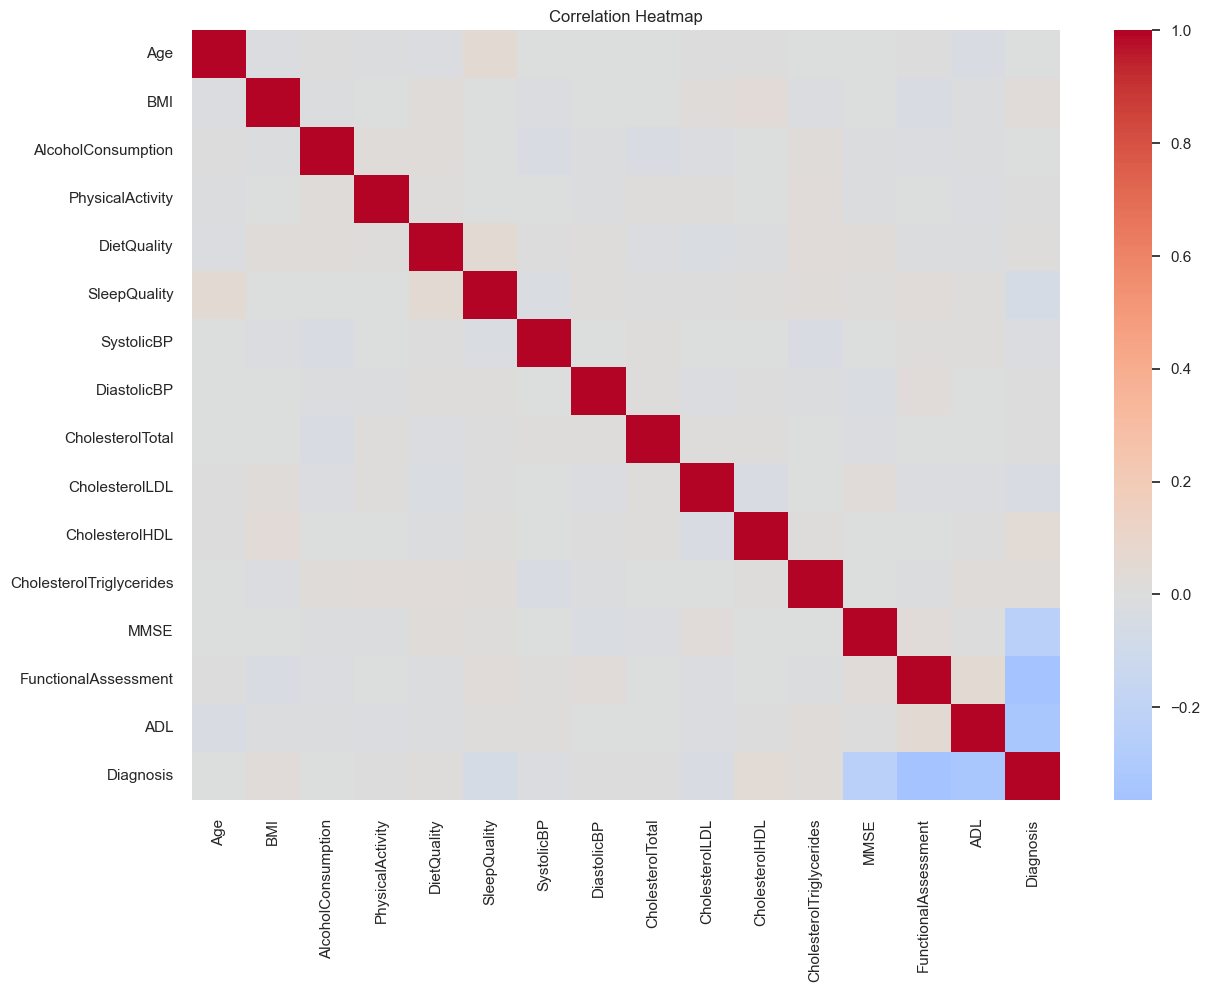

In [62]:
corr = df[numerical_cols + ["Diagnosis"]].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

We can see that of all Numerical Features, only MMSE, FunctionalAssessment, and ADL are highly correlated to a Diagnosis.

## Numerical Features VS Diagnosis

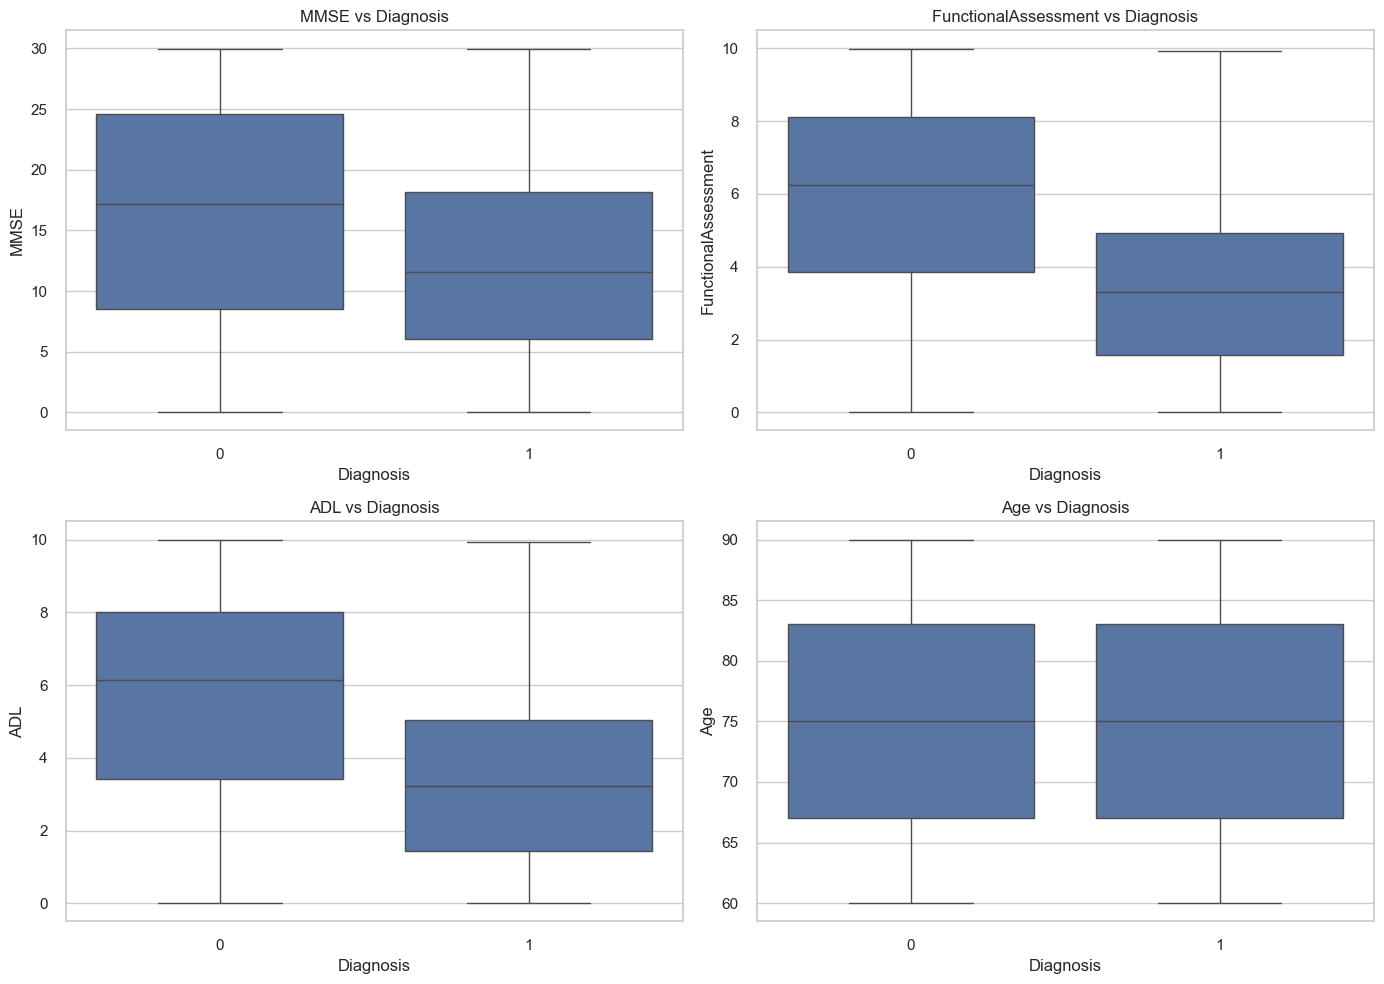

In [63]:
key_scores = ["MMSE", "FunctionalAssessment", "ADL", "Age"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(key_scores):
    sns.boxplot(x="Diagnosis", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Diagnosis")

plt.tight_layout()
plt.show()

he Numerical Features vs. Diagnosis charts are your most important find so far.

- **MMSE, Functional Assessment, and ADL:** These show a clear downward shift for patients with a Diagnosis of 1 (Alzheimer's). These are your "heavy hitters"—the features likely to have the highest permutation importance.

- **The Age Paradox:** Notice that Age looks almost identical for both groups. In many clinical datasets, age is a primary risk factor, but here it doesn't distinguish between the two classes, which is odd since Alzheimers as a degenerative brain condition should be impacted by it. This suggests your model will need to rely more heavily on cognitive scores than demographic data.

## Categorical Features VS Diagnosis

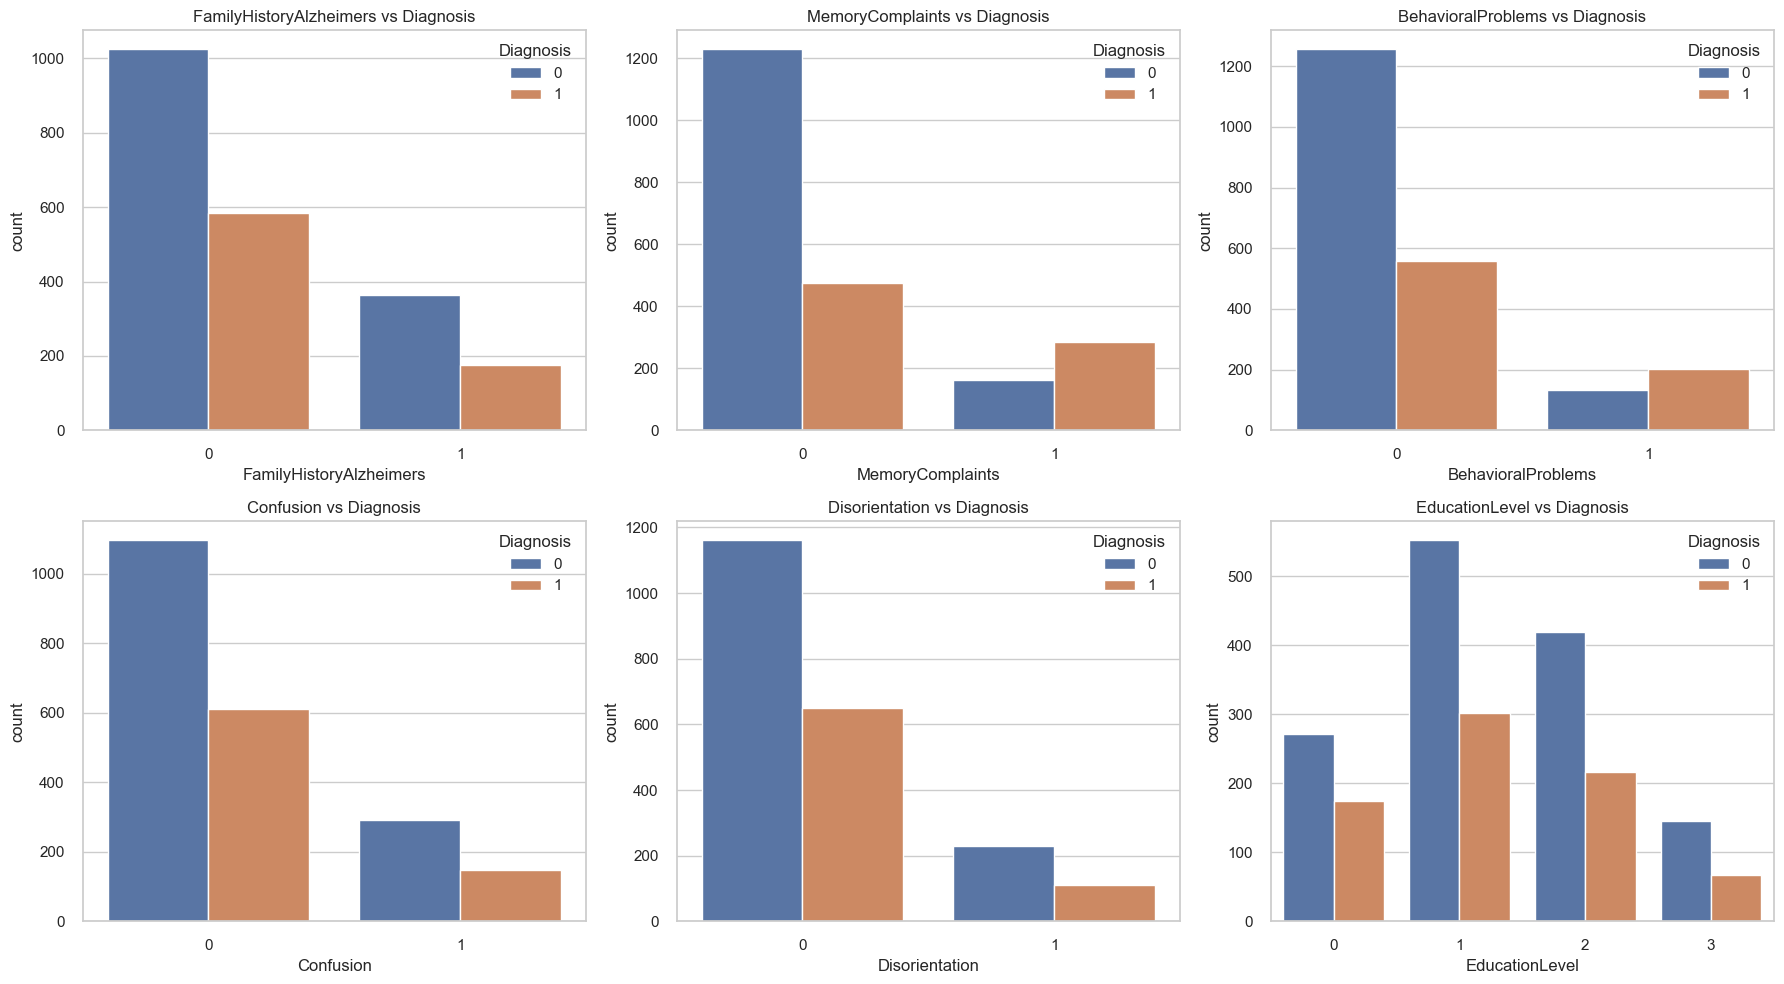

In [64]:
cat_vs_target = [
    "FamilyHistoryAlzheimers", "MemoryComplaints",
    "BehavioralProblems", "Confusion",
    "Disorientation", "EducationLevel"
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_vs_target):
    sns.countplot(x=col, hue="Diagnosis", data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Diagnosis")
    axes[i].legend(title="Diagnosis")

plt.tight_layout()
plt.show()

The countplots vs. Diagnosis reveal how symptoms translate to a clinical label.
- Memory Complaints & Behavioral Problems: These show a strong relative correlation. While most people (0) don't have these complaints, for the group that does have them (1), the proportion of Alzheimer's diagnoses (orange bars) increases significantly.
- Education Level: This feature shows a fairly even distribution of diagnoses across all four levels, suggesting it may have lower predictive power compared to clinical symptoms.

# Insights from Aggreagted Symptoms

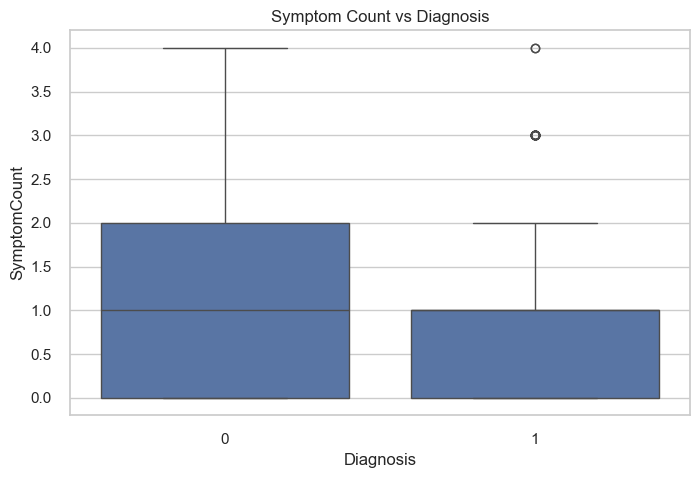

In [6]:
symptom_cols = [
    "Confusion", "Disorientation", "PersonalityChanges",
    "DifficultyCompletingTasks", "Forgetfulness"
]

df["SymptomCount"] = df[symptom_cols].sum(axis=1)

sns.boxplot(x="Diagnosis", y="SymptomCount", data=df)
plt.title("Symptom Count vs Diagnosis")
plt.show()

1. Interpretation of Symptom Count vs. Diagnosis
The most striking observation here is a counter-intuitive relationship:
- Higher Spread in Healthy Group: The "Healthy" group ($0$) actually shows a wider range of symptom counts, with the interquartile range (IQR) reaching up to $2$ symptoms and the upper whisker extending to $4$.
- Lower Median/IQR in Diagnosis Group: For the Alzheimer's group ($1$), the IQR is much tighter ($0$ to $1$), though it features distinct outliers at counts of $3$ and $4$.

The Interpretation: Usually, we expect higher symptom counts to correlate with a positive diagnosis. This "inverse" or noisy relationship suggests that while individual symptoms like MemoryComplaints show signal, the simple sum of all symptoms might be adding noise rather than a clear predictive path.

2. Holistic EDA Summary & Processing Needs:
- Scaling & Normalization (Crucial): The scale variance remains your biggest technical hurdle. Features like CholesterolTriglycerides reach values up to $400$, while cognitive scores like ADL and FunctionalAssessment stay within $0-10$.
> - Required Action: Apply StandardScaler to ensure the model doesn't over-index on the blood chemistry features simply because their raw numbers are larger.
- Handling Class Imbalance: Your target variable Diagnosis is heavily skewed toward $0$.
> - Required Action: You must use SMOTE (Synthetic Minority Over-sampling Technique) or a stratified split during training to prevent the model from becoming biased toward predicting the healthy majority.
- Categorical Encoding: We have several multi-class categorical features like Ethnicity and EducationLevel.
> - Required Action: Use One-Hot Encoding for Ethnicity (nominal) and potentially Ordinal Encoding for EducationLevel if you want to preserve the hierarchy of schooling.
- Feature Pruning:
> - The Age Factor: Your boxplots show almost no difference in Age between healthy and diagnosed patients.
> - The SymptomCount Paradox: Given the noise in the aggregated SymptomCount, you may want to test the model with and without this engineered feature to see if it actually improves performance.

# Task 2: Data Preprocessing + Modelling

## Standardise Column(s) Names
- Discussed with Brendon, we have some features that describe the same data but have different column names, best to standardise their names for easier integration.

In [7]:
df = df.rename(columns={'DiastolicBP': 'RestingDiastolicBP'})

## Feature Selection

In [8]:
# Drop EDA-identified low-signal / noisy features
df = df.drop(columns=["PatientID", "DoctorInCharge", "SymptomCount"])

## Feature Engineering

In [9]:
df["BP_interaction"] = df["SystolicBP"] - df["RestingDiastolicBP"]

Represents the difference between systolic and diastolic blood pressure.

High pulse pressure indicates stiffer arteries, which is linked to higher cardiovascular risk and can indirectly affect brain health and Alzheimer's risk.

In [10]:
df["Cholesterol_Ratio"] = df["CholesterolLDL"] / df["CholesterolHDL"]

Combines “bad” cholesterol (LDL) and “good” cholesterol (HDL) into a single indicator.

A higher ratio → greater risk of atherosclerosis → reduced blood flow to the brain, potentially increasing Alzheimer's risk.

In [11]:
df["TG_HDL_Index"] = df["CholesterolTriglycerides"] / df["CholesterolHDL"]

Captures the balance between triglycerides (blood fats) and protective HDL.

A high ratio → linked to metabolic syndrome and cardiovascular risk, which may also impact cognitive health.

## Initialise PyCaret Environment

In [12]:
import sys
import scipy

# The "Monkey Patch": 
# We tell Python that 'scipy.interp' is actually 'numpy.interp'
scipy.interp = np.interp

In [13]:
from pycaret.classification import *

### Cast all dtypes to float for pycaret's convenience.

In [14]:
df_pycaret = df.astype(float)

In [39]:
clf = setup(
    data=df_pycaret,
    target="Diagnosis",
    
    train_size=0.8,
    fold=5,
    fold_strategy="stratifiedkfold",
    
    normalize = False, 

    transformation=False,
    pca=False,
    remove_outliers=False,
    remove_multicollinearity=False,
    
    fix_imbalance=False,
    
    session_id=42,
    verbose=True,
    
    log_experiment=True,
    experiment_name="alzheimers_pycaret_final",
    log_data=True,
    log_plots=True
)

,Description,Value
0,Session id,42
1,Target,Diagnosis
2,Target type,Binary
3,Original data shape,"(2149, 36)"
4,Transformed data shape,"(2149, 36)"
5,Transformed train set shape,"(1719, 36)"
6,Transformed test set shape,"(430, 36)"
7,Numeric features,35
8,Preprocess,True
9,Imputation type,simple


In [40]:
best_models = compare_models(
    sort="F1",
    n_select=1
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9570,0.9533,0.9244,0.9526,0.9381,0.9051,0.9056,6.9980
gbc,Gradient Boosting Classifier,0.9465,0.9493,0.9129,0.9343,0.9234,0.8823,0.8826,0.5060
xgboost,Extreme Gradient Boosting,0.9471,0.9515,0.9047,0.9437,0.9234,0.8830,0.8839,0.4240
lightgbm,Light Gradient Boosting Machine,0.9465,0.9570,0.8998,0.9464,0.9222,0.8815,0.8825,0.7240
rf,Random Forest Classifier,0.9302,0.9530,0.8455,0.9517,0.8952,0.8432,0.8467,0.2360
ada,Ada Boost Classifier,0.9069,0.9351,0.8668,0.8695,0.8680,0.7962,0.7963,0.1500
dt,Decision Tree Classifier,0.9011,0.8900,0.8520,0.8661,0.8589,0.7828,0.7829,2.8420
lda,Linear Discriminant Analysis,0.8400,0.9004,0.7336,0.7994,0.7646,0.6438,0.6456,0.0320
ridge,Ridge Classifier,0.8400,0.9004,0.7270,0.8038,0.7630,0.6428,0.6450,0.0240
lr,Logistic Regression,0.8400,0.8971,0.7254,0.8035,0.7622,0.6422,0.6443,3.8080


2026/02/09 23:03:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/02/09 23:03:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/02/09 23:03:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/02/09 23:03:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/02/09 23:03:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/02/09 23:03:21 

In [41]:
# Base performance
test_predictions = predict_model(best_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9488,0.9415,0.9211,0.9333,0.9272,0.8877,0.8878


In [43]:
tuned_model = tune_model(
    best_models,
    optimize="AUC",
    choose_better=True,
    n_iter=50
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9622,0.9659,0.9339,0.9576,0.9456,0.9167,0.9168
1,0.9506,0.9466,0.9262,0.9339,0.9300,0.8918,0.8919
2,0.9622,0.9647,0.9262,0.9658,0.9456,0.9167,0.9171
3,0.9360,0.9476,0.8689,0.9464,0.9060,0.8577,0.8595
4,0.9738,0.9799,0.9669,0.9590,0.9630,0.9426,0.9427
Mean,0.9570,0.9609,0.9244,0.9526,0.9380,0.9051,0.9056
Std,0.0128,0.0125,0.0316,0.0112,0.0191,0.0286,0.0281


Fitting 5 folds for each of 50 candidates, totalling 250 fits


2026/02/09 23:21:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [44]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

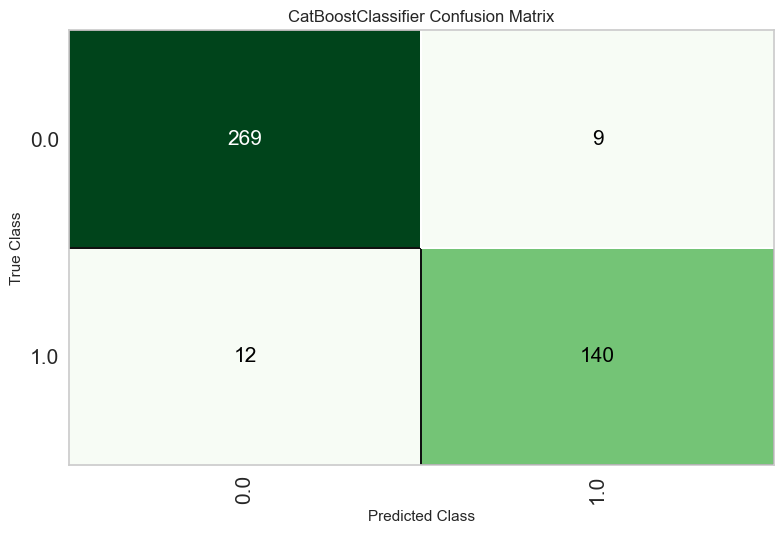

In [47]:
plot_model(tuned_model, plot='confusion_matrix')

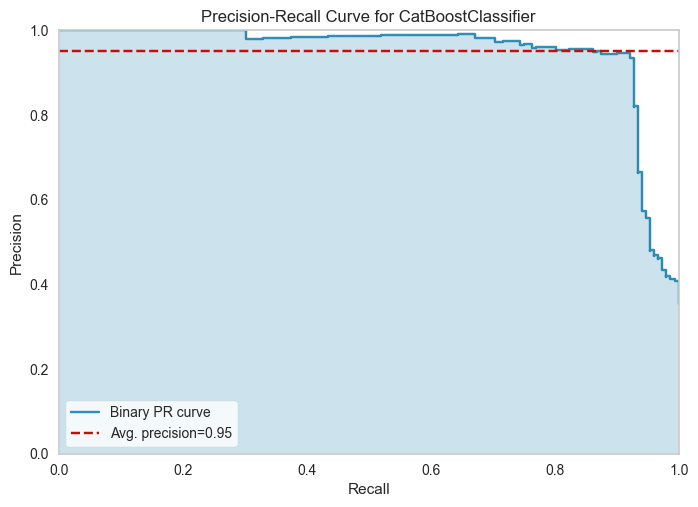

In [49]:
plot_model(tuned_model, plot='pr')

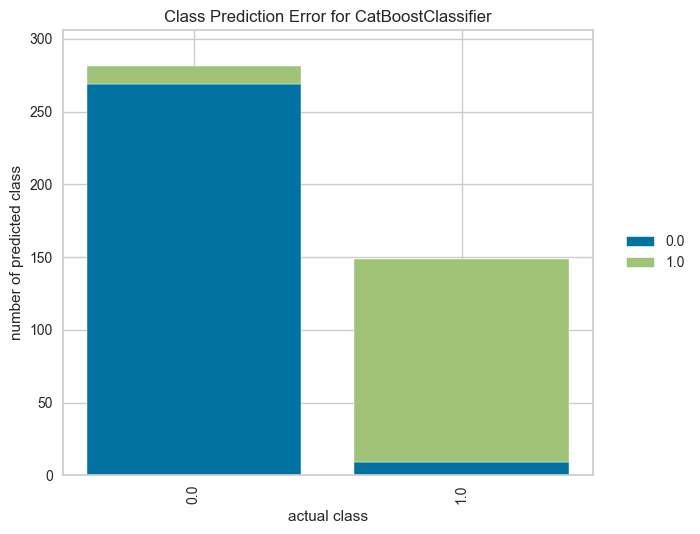

In [50]:
plot_model(tuned_model, plot='error')

## Test Set Performance

In [45]:
test_predictions = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9512,0.9546,0.9211,0.9396,0.9302,0.8927,0.8928


# Try to see if only keeping important features is better:

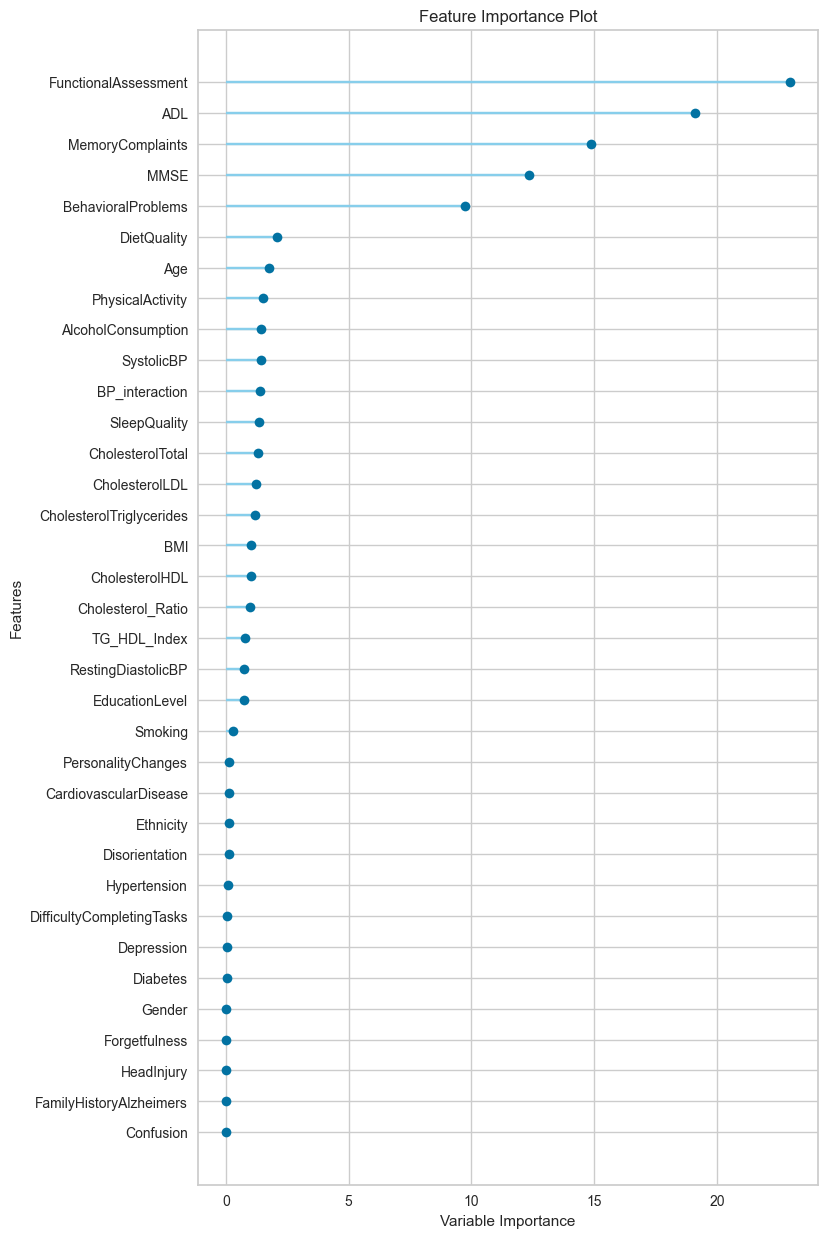

In [52]:
# Generate the feature importance plot
plot_model(tuned_model, plot='feature_all')

## Lock in the Top 10 Features

In [15]:
selected_features = [
    "FunctionalAssessment",
    "ADL",
    "MemoryComplaints",
    "MMSE",
    "BehavioralProblems",
    "DietQuality",
    "Age",
    "PhysicalActivity",
    "AlcoholConsumption",
    "SystolicBP"
]

In [16]:
df_fs = df_pycaret[selected_features + ["Diagnosis"]]

In [17]:
df_fs.head()

,FunctionalAssessment,ADL,MemoryComplaints,MMSE,BehavioralProblems,DietQuality,Age,PhysicalActivity,AlcoholConsumption,SystolicBP,Diagnosis
0,6.518877,1.725883,0.0,21.463532,0.0,1.347214,73.0,6.327112,13.297218,142.0,0.0
1,7.118696,2.592424,0.0,20.613267,0.0,0.518767,89.0,7.619885,4.542524,115.0,0.0
2,5.895077,7.119548,0.0,7.356249,0.0,1.826335,73.0,7.844988,19.555085,99.0,0.0
3,8.965106,6.481226,0.0,13.991127,1.0,7.435604,74.0,8.428001,12.209266,118.0,0.0
4,6.045039,0.014691,0.0,13.517609,0.0,0.795498,89.0,6.310461,18.454356,94.0,0.0


## Remodelling

In [18]:
clf_fs = setup(
    data=df_fs,
    target="Diagnosis",
    
    train_size=0.8,
    fold=5,
    fold_strategy="stratifiedkfold",
    
    normalize = False, 

    transformation=False,
    pca=False,
    remove_outliers=False,
    remove_multicollinearity=False,
    
    fix_imbalance=False,
    
    session_id=42,
    verbose=True,
    
    log_experiment=True,
    experiment_name="alzheimers_catboost_top10",
    log_data=True,
    log_plots=True
)

,Description,Value
0,Session id,42
1,Target,Diagnosis
2,Target type,Binary
3,Original data shape,"(2149, 11)"
4,Transformed data shape,"(2149, 11)"
5,Transformed train set shape,"(1719, 11)"
6,Transformed test set shape,"(430, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [19]:
cat_fs = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9535,0.9639,0.9091,0.9565,0.9322,0.8968,0.8975
1,0.9360,0.9484,0.9016,0.9167,0.9091,0.8598,0.8598
2,0.9622,0.9614,0.9262,0.9658,0.9456,0.9167,0.9171
3,0.9390,0.9472,0.8770,0.9469,0.9106,0.8644,0.8658
4,0.9738,0.9647,0.9669,0.9590,0.9630,0.9426,0.9427
Mean,0.9529,0.9571,0.9162,0.9490,0.9321,0.8961,0.8966
Std,0.0141,0.0077,0.0299,0.0173,0.0206,0.0314,0.0311


2026/02/09 23:56:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


- Mean	0.9570	0.9609	0.9244	0.9526	0.9380	0.9051	0.9056

Compared to the Tuned Model that was trained on all features, this one that only uses the top 10 shows comparable performance even when untuned. I will proceed with this, as a UI that only needs 10 inputs will be much easier on users compared to 35.

In [20]:
tuned_fs = tune_model(
    cat_fs,
    optimize="F1",
    choose_better=True,
    n_iter=50
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9593,0.9711,0.9339,0.9496,0.9417,0.9104,0.9105
1,0.9477,0.9389,0.9180,0.9333,0.9256,0.8853,0.8853
2,0.9651,0.9667,0.9262,0.9741,0.9496,0.9229,0.9236
3,0.9419,0.9562,0.8852,0.9474,0.9153,0.8711,0.8722
4,0.9738,0.9695,0.9669,0.9590,0.9630,0.9426,0.9427
Mean,0.9575,0.9605,0.9261,0.9527,0.9390,0.9065,0.9069
Std,0.0115,0.0120,0.0263,0.0135,0.0169,0.0257,0.0254


Fitting 5 folds for each of 50 candidates, totalling 250 fits


2026/02/10 00:01:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


- Mean 0.9570 0.9609 0.9244 0.9526 0.9380 0.9051 0.9056

After tuning, the limited-feature catboost model has metric closer to the full model. Interestingly, accuracy metrics like accuracy, kappa, and mcc actually do better.

In [59]:
evaluate_model(tuned_fs)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

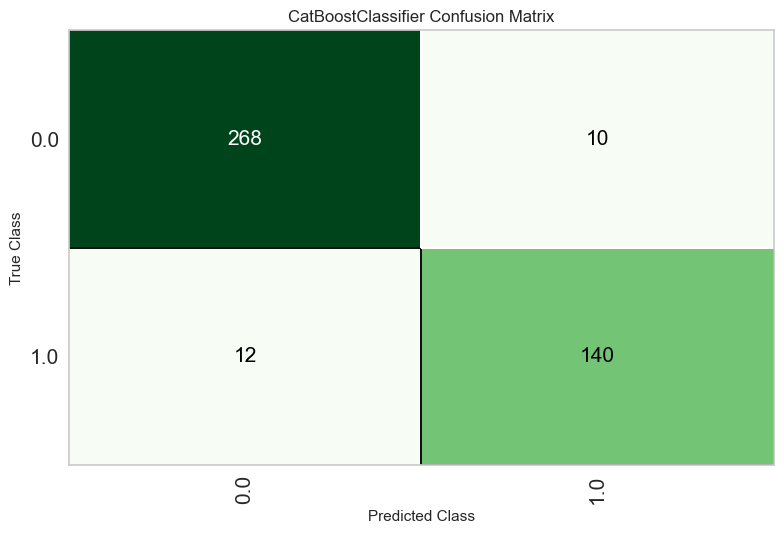

In [61]:
plot_model(tuned_fs, plot='confusion_matrix')

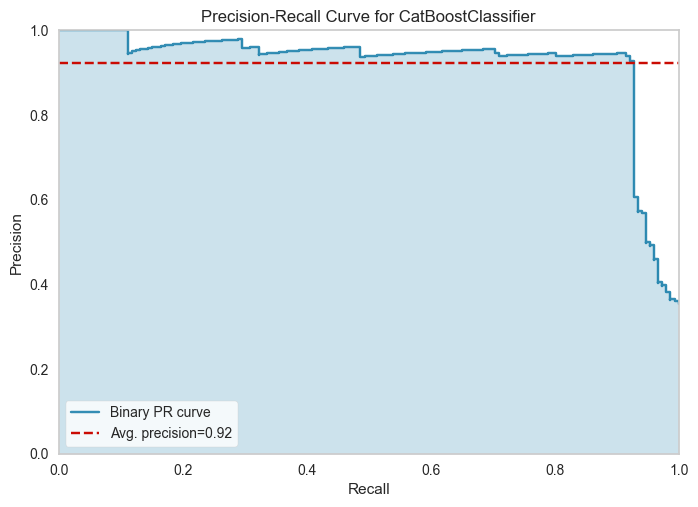

In [62]:
plot_model(tuned_fs, plot='pr')

In [63]:
test_predictions = predict_model(tuned_fs)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9488,0.9401,0.9211,0.9333,0.9272,0.8877,0.8878


# Save Model

In [21]:
save_model(tuned_fs, 'alzheimers_catboost_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['FunctionalAssessment', 'ADL',
                                              'MemoryComplaints', 'MMSE',
                                              'BehavioralProblems',
                                              'DietQuality', 'Age',
                                              'PhysicalActivity',
                                              'AlcoholConsumption',
                                              'SystolicBP'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                            

# Serve Model on Mlflow

In [22]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

In [23]:
final_model = finalize_model(tuned_fs)

2026/02/10 00:02:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [24]:
mlflow.set_experiment("alzheimers_catboost_top10")

mlflow.sklearn.log_model(
    sk_model=final_model,
    artifact_path="model",
    registered_model_name="alzheimers_catboost_classifier_fstuned"
)

2026/02/10 00:02:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'alzheimers_catboost_classifier_fstuned'.
Created version '1' of model 'alzheimers_catboost_classifier_fstuned'.


In [25]:
!mlflow ui

^C
